<a href="https://colab.research.google.com/github/nikkialparito/mis_netflix/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include='O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
list(df.title.unique())

['Dick Johnson Is Dead',
 'Blood & Water',
 'Ganglands',
 'Jailbirds New Orleans',
 'Kota Factory',
 'Midnight Mass',
 'My Little Pony: A New Generation',
 'Sankofa',
 'The Great British Baking Show',
 'The Starling',
 'Vendetta: Truth, Lies and The Mafia',
 'Bangkok Breaking',
 'Je Suis Karl',
 'Confessions of an Invisible Girl',
 'Crime Stories: India Detectives',
 'Dear White People',
 "Europe's Most Dangerous Man: Otto Skorzeny in Spain",
 'Falsa identidad',
 'Intrusion',
 'Jaguar',
 'Monsters Inside: The 24 Faces of Billy Milligan',
 'Resurrection: Ertugrul',
 'Avvai Shanmughi',
 'Go! Go! Cory Carson: Chrissy Takes the Wheel',
 'Jeans',
 'Love on the Spectrum',
 'Minsara Kanavu',
 'Grown Ups',
 'Dark Skies',
 'Paranoia',
 'Ankahi Kahaniya',
 'Chicago Party Aunt',
 'Sex Education',
 'Squid Game',
 'Tayo and Little Wizards',
 'The Father Who Moves Mountains',
 'The Stronghold',
 'Angry Birds',
 'Birth of the Dragon',
 'Chhota Bheem',
 'He-Man and the Masters of the Universe',
 'Jaws

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df[df.duplicated(keep='first')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
plt.figure(figsize=(10,6))
    plt.hist(df['show_id'],color='y')
    plt.title('Show ID Distribution',size=18)
    plt.xlabel('Show ID',size=14)
    plt.ylabel('Density',size=14)
    plt.show()

IndentationError: unexpected indent (<ipython-input-23-6c0c43b6edc3>, line 2)

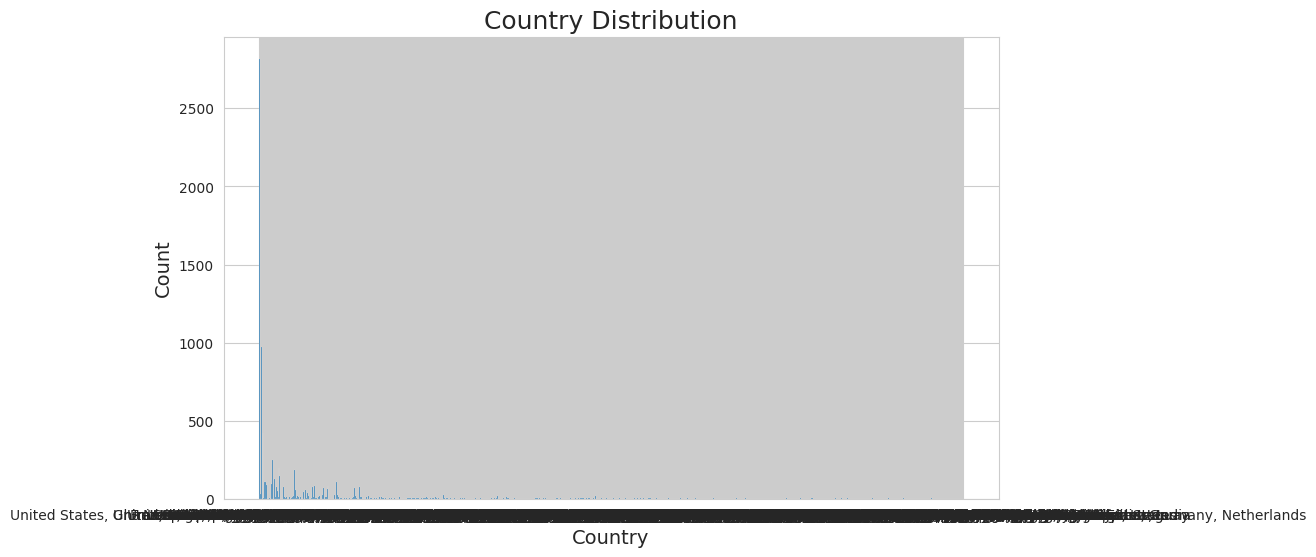

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df.country)
plt.title('Country Distribution',size=18)
plt.xlabel('Country',size=14)
plt.ylabel('Count',size=14)
plt.show()

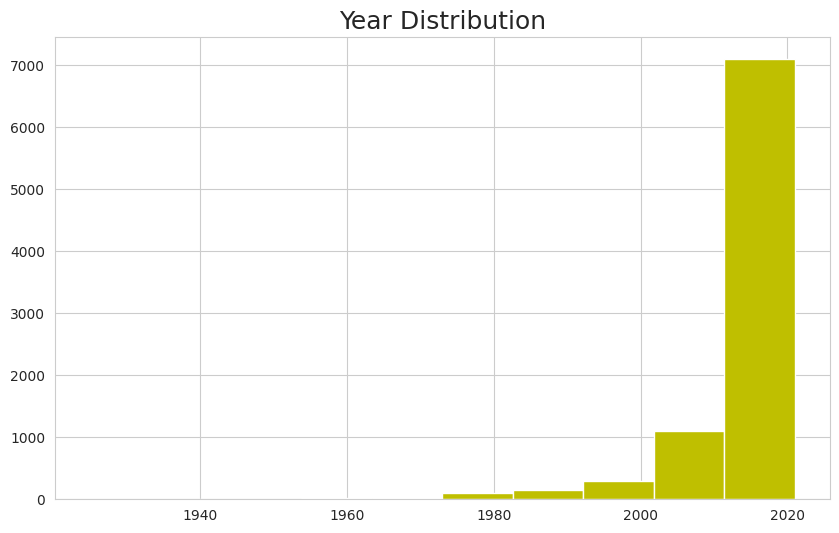

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.release_year,color='y')
plt.title('Year Distribution',size=18)
plt.show()

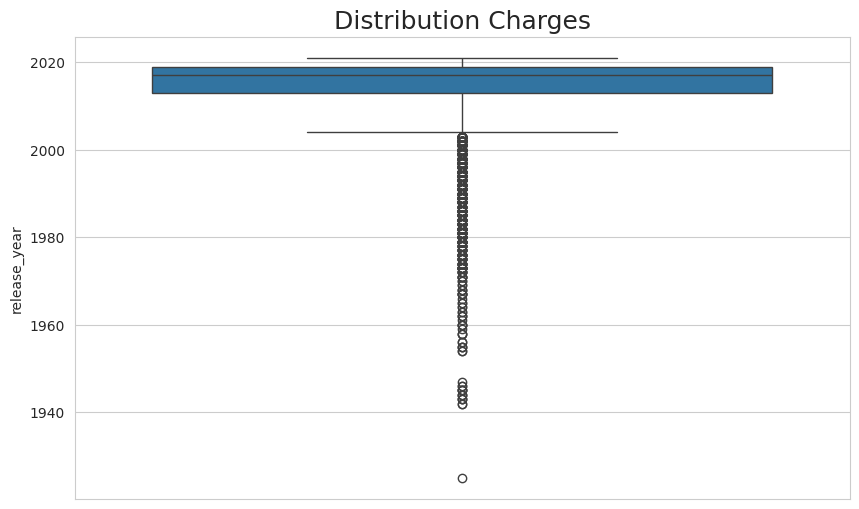

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(df.release_year)
plt.title('Distribution Charges',size=18)
plt.show()

In [94]:
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6.0


In [93]:
# Convert 'release_year' to numeric, replacing non-numeric values with NaN
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Calculate quantiles
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

2013.0 2019.0 6.0


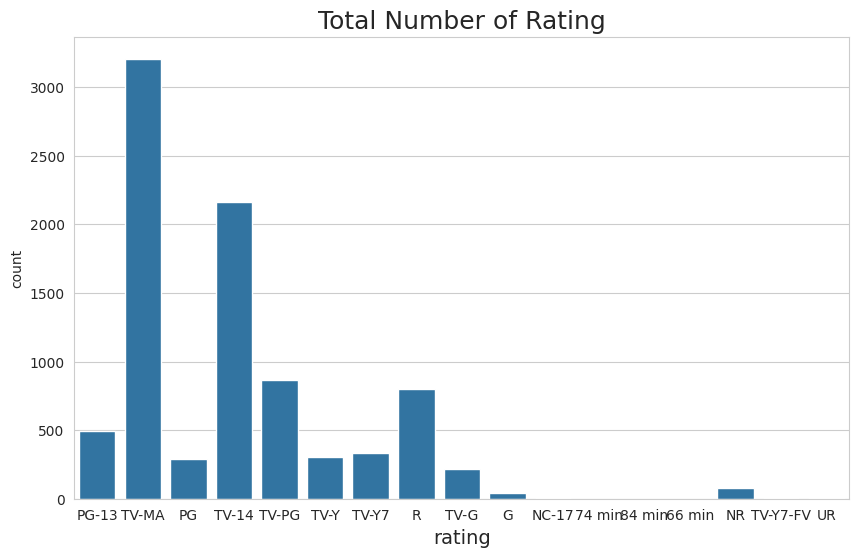

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'rating', data = df)
plt.title('Total Number of Rating',size=18)
plt.xlabel('rating',size=14)
plt.show()

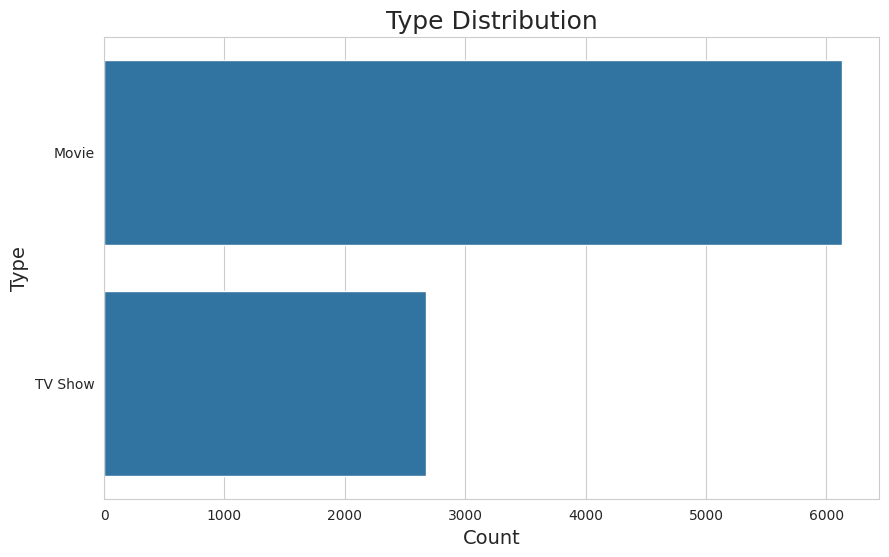

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df.type)
plt.title('Type Distribution',size=18)
plt.xlabel('Count',size=14)
plt.ylabel('Type',size=14)
plt.show()

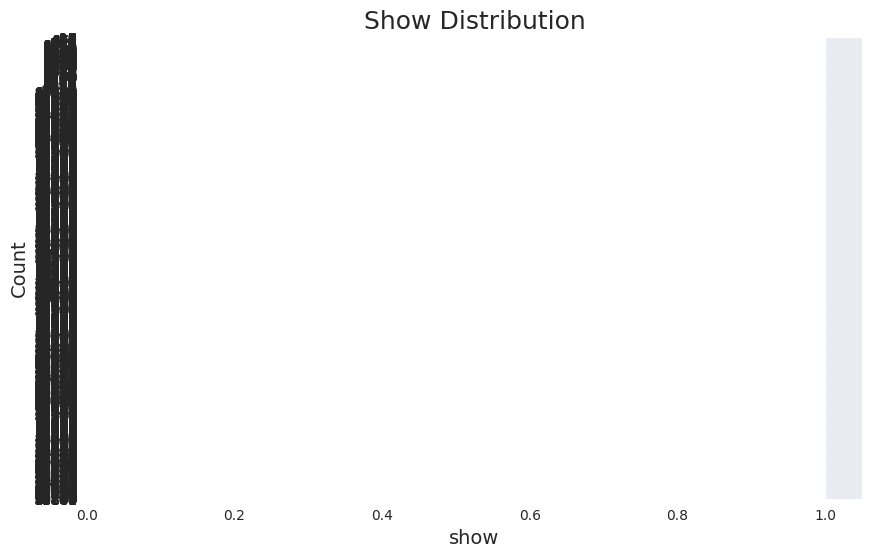

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df.show_id)
plt.title('Show Distribution',size=18)
plt.xlabel('show',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [ ]:
df.type.value_counts()

,count
type,
Movie,6131
TV Show,2676


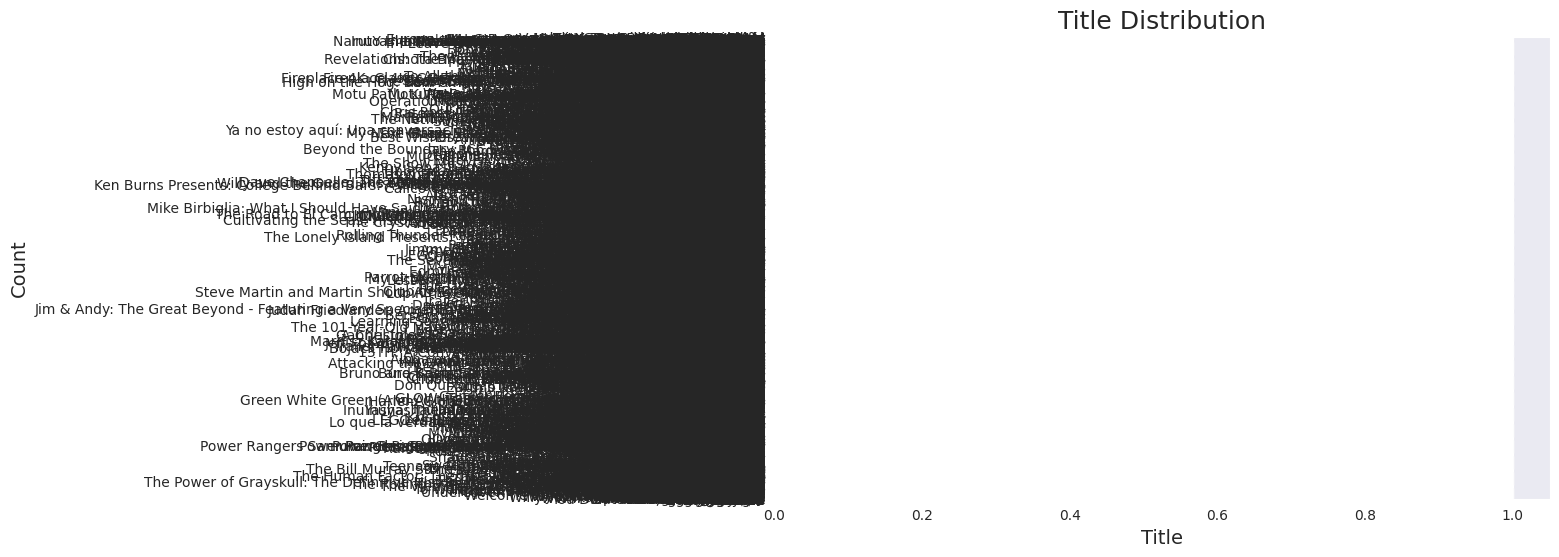

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df.title,palette='Blues')
plt.title('Title Distribution',size=18)
plt.xlabel('Title',size=14)
plt.ylabel('Count',size=14)
plt.show()

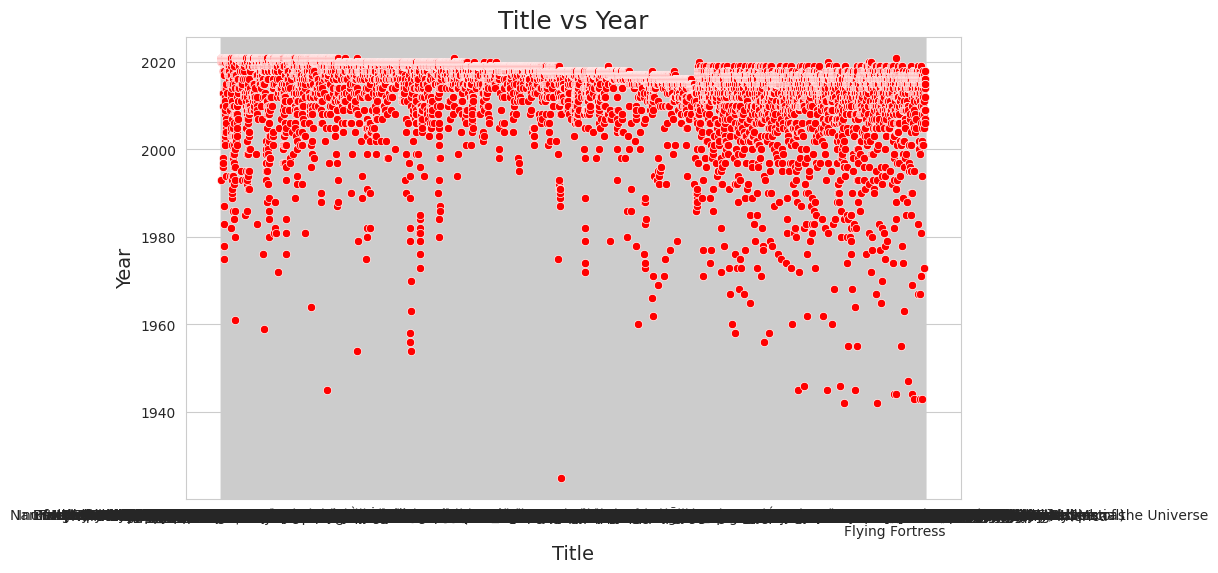

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='title',y='release_year',color='r',data=df)
plt.title('Title vs Year',size=18)
plt.xlabel('Title',size=14)
plt.ylabel('Year',size=14)
plt.show()

In [111]:
correlation = numeric_df.corr()['rating']['duration']
print('Correlation between rating and duration is : {}'.format(round(correlation,3)))

KeyError: 'rating'

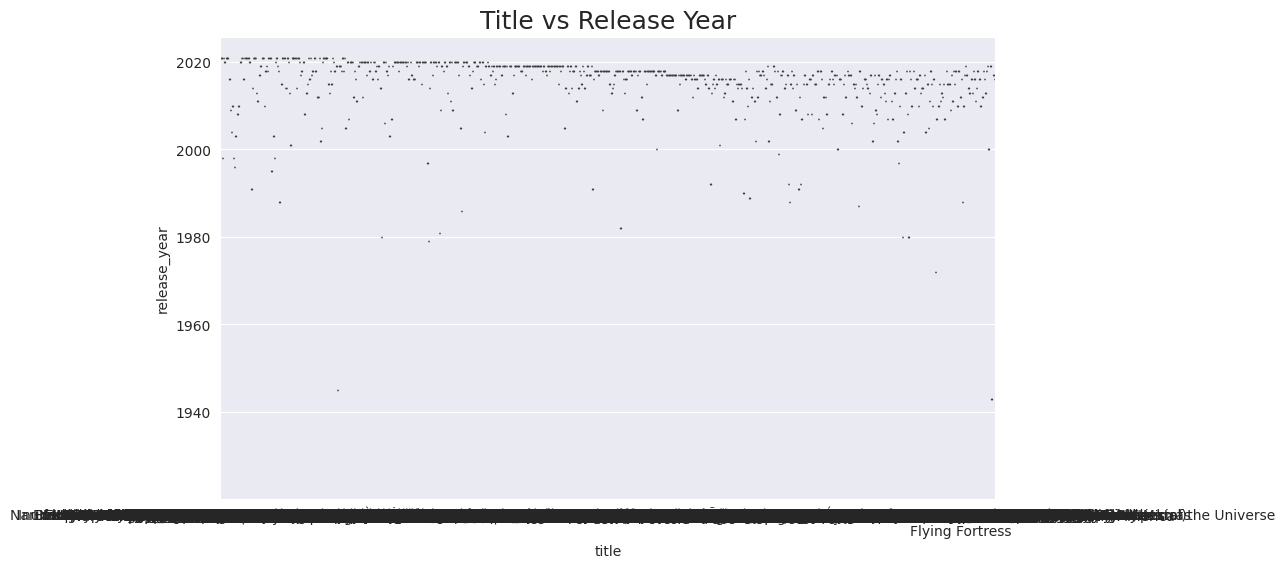

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='title',y='release_year',data=df)
plt.title('Title vs Release Year',size=18);

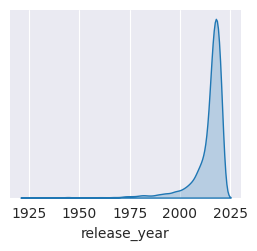

In [ ]:
sns.pairplot(df,
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.7,
                                           'color': 'red'}},
                 corner=True);

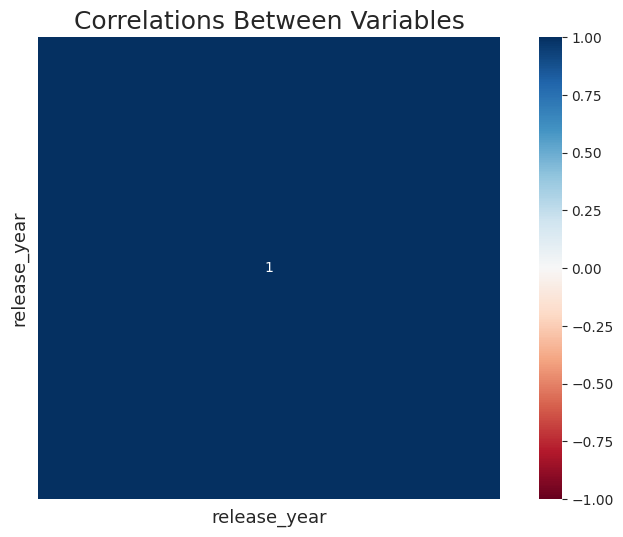

In [82]:
plt.figure(figsize = (10,6))

# Select only the numeric columns for correlation calculation.
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix using the numeric data.
sns.heatmap(numeric_df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)

plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [113]:
!pip install streamlit==1.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninst

In [1]:
import streamlit as st
import pandas as pd
import altair as alt
import plotly.express as px

In [2]:
st.set_page_config(
    page_title="Netflix Dashboard",
    page_icon="🏂",
    layout="wide",
    initial_sidebar_state="expanded")

alt.themes.enable("dark")

<ipython-input-2-0c898bdfd5bc>:7: AltairDeprecationWarning: 
Deprecated since `altair=5.5.0`. Use altair.theme instead.
Most cases require only the following change:

    # Deprecated
    alt.themes.enable('quartz')

    # Updated
    alt.theme.enable('quartz')

If your code registers a theme, make the following change:

    # Deprecated
    def custom_theme():
        return {'height': 400, 'width': 700}
    alt.themes.register('theme_name', custom_theme)
    alt.themes.enable('theme_name')

    # Updated
    @alt.theme.register('theme_name', enable=True)
    def custom_theme():
        return alt.theme.ThemeConfig(
            {'height': 400, 'width': 700}
        )

See the updated User Guide for further details:
    https://altair-viz.github.io/user_guide/api.html#theme
    https://altair-viz.github.io/user_guide/customization.html#chart-themes
  alt.themes.enable("dark")


ThemeRegistry.enable('dark')

In [9]:
df_reshaped = pd.read_csv('netflix_titles.csv')

In [8]:
with st.sidebar:
    st.title('🏂 Netflix Dashboard')

    # Access the 'release_year' column instead of 'year'
    release_year = list(df_reshaped.release_year.unique())[::-1]

    release_year = st.selectbox('Select a year', release_year, index=len(release_year)-1)
    # Access the 'release_year' column instead of 'year'
    df_release_year = df_reshaped[df_reshaped.release_year == release_year]
    df_release_year_sorted = df_release_year.sort_values(by="release_year", ascending=False)

    color_theme_list = ['blues', 'cividis', 'greens', 'inferno', 'magma', 'plasma', 'reds', 'rainbow', 'turbo', 'viridis']
    selected_color_theme = st.selectbox('Select a color theme', color_theme_list)

In [10]:
def make_heatmap(input_df, input_y, input_x, input_color, input_color_theme):
    heatmap = alt.Chart(input_df).mark_rect().encode(
            y=alt.Y(f'{input_y}:O', axis=alt.Axis(title="Year", titleFontSize=18, titlePadding=15, titleFontWeight=900, labelAngle=0)),
            x=alt.X(f'{input_x}:O', axis=alt.Axis(title="", titleFontSize=18, titlePadding=15, titleFontWeight=900)),
            color=alt.Color(f'max({input_color}):Q',
                             legend=None,
                             scale=alt.Scale(scheme=input_color_theme)),
            stroke=alt.value('black'),
            strokeWidth=alt.value(0.25),
        ).properties(width=900
        ).configure_axis(
        labelFontSize=12,
        titleFontSize=12
        )
    # height=300
    return heatmap

In [11]:
# Choropleth Map for Netflix Content by Country
def make_choropleth(input_df, input_id, input_column, input_color_theme):
    choropleth = px.choropleth(input_df, locations=input_id, color=input_column, locationmode="country names",
                               color_continuous_scale=input_color_theme,
                               range_color=(0, max(input_df[input_column].dropna())),
                               scope="world",
                               labels={input_column: 'Number of Titles'}
                              )
    choropleth.update_layout(
        template='plotly_dark',
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        margin=dict(l=0, r=0, t=0, b=0),
        height=350
    )
    return choropleth


In [12]:
# Calculate Difference in Number of Titles Over Years
def calculate_title_difference(input_df, input_year):
    selected_year_data = input_df[input_df['release_year'] == input_year].groupby('country').size().reset_index(name='title_count')
    previous_year_data = input_df[input_df['release_year'] == input_year - 1].groupby('country').size().reset_index(name='title_count')
    merged_data = pd.merge(selected_year_data, previous_year_data, on='country', how='left', suffixes=('_current', '_previous'))
    merged_data['title_difference'] = merged_data['title_count_current'].sub(merged_data['title_count_previous'], fill_value=0)
    return merged_data.sort_values(by="title_difference", ascending=False)

In [13]:
def make_donut(input_response, input_text, input_color):
  if input_color == 'blue':
      chart_color = ['#29b5e8', '#155F7A']
  if input_color == 'green':
      chart_color = ['#27AE60', '#12783D']
  if input_color == 'orange':
      chart_color = ['#F39C12', '#875A12']
  if input_color == 'red':
      chart_color = ['#E74C3C', '#781F16']

  source = pd.DataFrame({
      "Topic": ['', input_text],
      "% value": [100-input_response, input_response]
  })
  source_bg = pd.DataFrame({
      "Topic": ['', input_text],
      "% value": [100, 0]
  })

  plot = alt.Chart(source).mark_arc(innerRadius=45, cornerRadius=25).encode(
      theta="% value",
      color= alt.Color("Topic:N",
                      scale=alt.Scale(
                          #domain=['A', 'B'],
                          domain=[input_text, ''],
                          # range=['#29b5e8', '#155F7A']),  # 31333F
                          range=chart_color),
                      legend=None),
  ).properties(width=130, height=130)

  text = plot.mark_text(align='center', color="#29b5e8", font="Lato", fontSize=32, fontWeight=700, fontStyle="italic").encode(text=alt.value(f'{input_response} %'))
  plot_bg = alt.Chart(source_bg).mark_arc(innerRadius=45, cornerRadius=20).encode(
      theta="% value",
      color= alt.Color("Topic:N",
                      scale=alt.Scale(
                          # domain=['A', 'B'],
                          domain=[input_text, ''],
                          range=chart_color),  # 31333F
                      legend=None),
  ).properties(width=130, height=130)
  return plot_bg + plot + text

In [14]:
# Donut Chart for Netflix Content Distribution
def make_donut(input_response, input_text, input_color):
    color_map = {
        'blue': ['#29b5e8', '#155F7A'],
        'green': ['#27AE60', '#12783D'],
        'orange': ['#F39C12', '#875A12'],
        'red': ['#E74C3C', '#781F16']
    }
    chart_color = color_map.get(input_color, ['#29b5e8', '#155F7A'])

    source = pd.DataFrame({
        "Category": ['', input_text],
        "Percentage": [100 - input_response, input_response]
    })

    plot = alt.Chart(source).mark_arc(innerRadius=45, cornerRadius=25).encode(
        theta="Percentage",
        color=alt.Color("Category:N", scale=alt.Scale(domain=[input_text, ''], range=chart_color), legend=None)
    ).properties(width=130, height=130)

    text = plot.mark_text(align='center', color=chart_color[0], fontSize=18, fontWeight=700).encode(text=alt.value(f'{input_response} %'))

    return plot + text

In [15]:
def format_number(num):
    if num > 1000000:
        if not num % 1000000:
            return f'{num // 1000000} M'
        return f'{round(num / 1000000, 1)} M'
    return f'{num // 1000} K'

In [16]:
col = st.columns((1.5, 4.5, 2), gap='medium')

In [21]:
# Display Gains/Losses in Netflix Titles by Year
import streamlit as st
import pandas as pd

# ... (other code) ...

# Load your dataframe here
df = pd.read_csv('netflix_titles.csv')

# Define the calculate_title_difference function
def calculate_title_difference(input_df, input_year):
    selected_year_data = input_df[input_df['release_year'] == input_year].groupby('country').size().reset_index(name='title_count')
    previous_year_data = input_df[input_df['release_year'] == input_year - 1].groupby('country').size().reset_index(name='title_count')
    merged_data = pd.merge(selected_year_data, previous_year_data, on='country', how='left', suffixes=('_current', '_previous'))
    merged_data['title_difference'] = merged_data['title_count_current'].sub(merged_data['title_count_previous'], fill_value=0)
    return merged_data.sort_values(by="title_difference", ascending=False)


st.markdown('#### Gains/Losses')
df_title_difference_sorted = calculate_title_difference(df, release_year) # Call the newly defined function

if not df_title_difference_sorted.empty:
    top_country = df_title_difference_sorted.iloc[0]
    st.metric(label=top_country['country'], value=top_country['title_count_current'], delta=top_country['title_difference'])
    bottom_country = df_title_difference_sorted.iloc[-1]
    st.metric(label=bottom_country['country'], value=bottom_country['title_count_current'], delta=bottom_country['title_difference'])

In [23]:
st.markdown('#### Total Titles')
choropleth = make_choropleth(df, 'country', 'show_id', 'plasma')
st.plotly_chart(choropleth, use_container_width=True)

heatmap_data = df.groupby(['release_year', 'country']).size().reset_index(name='title_count')
heatmap = make_heatmap(heatmap_data, 'release_year', 'country', 'title_count', 'plasma')
st.altair_chart(heatmap, use_container_width=True)

DeltaGenerator()

In [24]:
st.markdown('#### Top Countries')
top_countries_df = df['country'].value_counts().reset_index()
top_countries_df.columns = ['Country', 'Title Count']
st.dataframe(top_countries_df, hide_index=True)

with st.expander('About', expanded=True):
    st.write('''
        - Data: Netflix dataset
        - :orange[**Most Content-Producing Countries**]: Top countries by number of Netflix titles
        - :orange[**Content Trends**]: Distribution of titles across different years
        ''')